In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv', nrows=10000)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

Number of rows: 10000
Number of columns: 11



In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 859.5+ KB
None


In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# --- Feature Engineering ---
df['isPayment'] = df['type'].apply(lambda x: 1 if x in ['PAYMENT', 'DEBIT'] else 0)
df['isMovement'] = df['type'].apply(lambda x: 1 if x in ['CASH_OUT', 'TRANSFER'] else 0)
df['accountDiff'] = df['oldbalanceOrg'] - df['oldbalanceDest']

df = df[df['amount'] < 5000000]

X = df[['amount', 'isPayment', 'isMovement', 'accountDiff']].values
y = df['isFraud'].values

In [ ]:
#Standardization
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

print("\n=== After Preprocessing ===")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")


=== After Preprocessing ===
Training Samples: 7998
Testing Samples: 2000


In [ ]:
import seaborn as sns
from imblearn.over_sampling import SMOTE

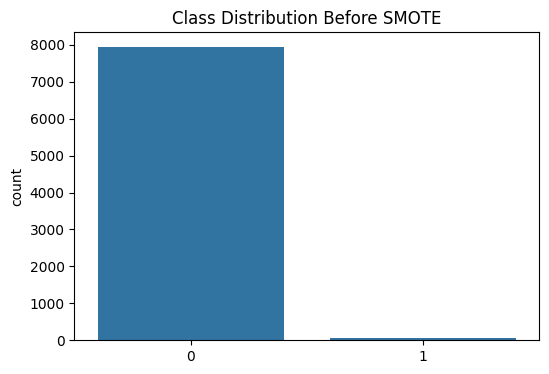

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.show()

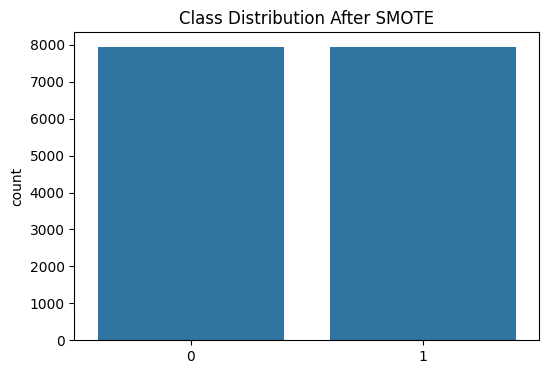

In [ ]:
smote = SMOTE(random_state=42)

x_train, Y_train = smote.fit_resample(X_train, y_train)
plt.figure(figsize=(6, 4))

sns.countplot(x=Y_train)

plt.title("Class Distribution After SMOTE")

plt.show()

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000, verbose=True, plot_loss=True):
        self.lr = lr
        self.epochs = epochs
        self.verbose = verbose
        self.plot_loss = plot_loss
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for epoch in range(1, self.epochs + 1):
            linear = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear)

            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)

            if self.verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}/{self.epochs} - Loss: {loss:.4f}")

        if self.plot_loss:
            self.plot_training_loss()

    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear)
        return np.where(y_pred >= 0.5, 1, 0)

    def plot_training_loss(self):
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, self.epochs + 1), self.loss_history, label='Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss over Epochs')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Epoch 100/1000 - Loss: 0.5027
Epoch 200/1000 - Loss: 0.3831
Epoch 300/1000 - Loss: 0.3055
Epoch 400/1000 - Loss: 0.2527
Epoch 500/1000 - Loss: 0.2152
Epoch 600/1000 - Loss: 0.1875
Epoch 700/1000 - Loss: 0.1664
Epoch 800/1000 - Loss: 0.1499
Epoch 900/1000 - Loss: 0.1366
Epoch 1000/1000 - Loss: 0.1259


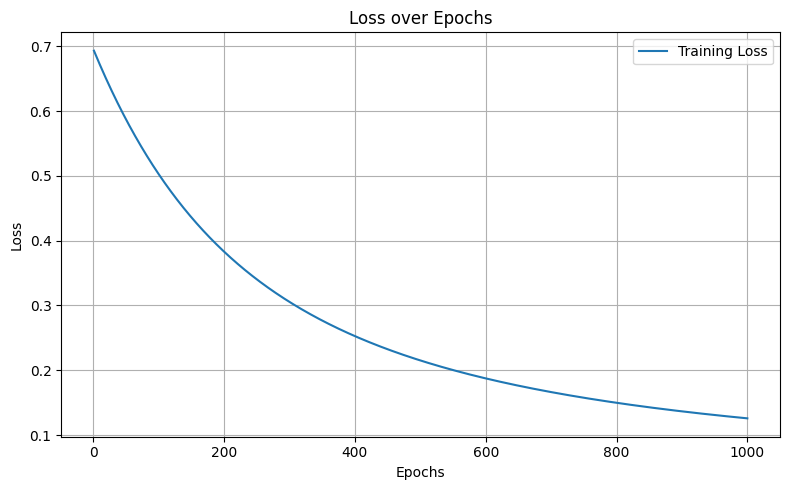

Logistic Regression Accuracy : 0.9955


In [ ]:
log_reg = LogisticRegressionScratch(lr=0.01, epochs=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
acc_log_reg = accuracy(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy : {acc_log_reg:.4f}")

In [ ]:
# KNN from Scratch
class KNNScratch:
    def __init__(self, k=5, verbose=True):
        self.k = k
        self.verbose = verbose

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        total = len(X)

        for i in range(total):
            if self.verbose and (i + 1) % 1000 == 0:
                print(f"Processed {i + 1}/{total} samples during training")

    def predict(self, X):
        preds = []
        total = len(X)
        for i, x in enumerate(X):
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            k_indices = distances.argsort()[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            majority_vote = np.bincount(k_nearest_labels).argmax()
            preds.append(majority_vote)

        return np.array(preds)



In [ ]:
knn = KNNScratch(k=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy(y_test, y_pred_knn)

print(f"KNN Accuracy : {acc_knn:.4f}")

Processed 1000/7998 samples during training
Processed 2000/7998 samples during training
Processed 3000/7998 samples during training
Processed 4000/7998 samples during training
Processed 5000/7998 samples during training
Processed 6000/7998 samples during training
Processed 7000/7998 samples during training
KNN Accuracy : 0.9915


In [ ]:
# Naive Bayes from Scratch
import numpy as np

class NaiveBayesScratch:
    def __init__(self, verbose=True):
        self.verbose = verbose

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}
        total_classes = len(self.classes)

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-6
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        preds = []
        total = len(X)
        for i, x in enumerate(X):
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.var[c]))
                likelihood -= 0.5 * np.sum(((x - self.mean[c]) ** 2) / self.var[c])
                posterior = prior + likelihood
                posteriors.append(posterior)
            preds.append(self.classes[np.argmax(posteriors)])

        return np.array(preds)

In [ ]:
nb = NaiveBayesScratch()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy : {acc_nb:.4f}")

Naive Bayes Accuracy : 0.8200


In [ ]:
# --- SVM  ---
class SVMScratch:
    def __init__(self, lr=0.001, epochs=1000, lambda_param=0.01, verbose=True):
        self.lr = lr
        self.epochs = epochs
        self.lambda_param = lambda_param
        self.verbose = verbose

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(self.epochs):
            for idx, xi in enumerate(X):
                condition = y_[idx] * (np.dot(xi, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights - np.dot(xi, y_[idx]))
                    self.bias -= self.lr * y_[idx]

            if self.verbose and (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs} completed")

    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.where(approx >= 0, 1, 0)


In [ ]:
svm = SVMScratch(lr=0.01, epochs=1000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy(y_test, y_pred_svm)
print(f"SVM Accuracy : {acc_svm:.4f}")

Epoch 100/1000 completed
Epoch 200/1000 completed
Epoch 300/1000 completed
Epoch 400/1000 completed
Epoch 500/1000 completed
Epoch 600/1000 completed
Epoch 700/1000 completed
Epoch 800/1000 completed
Epoch 900/1000 completed
Epoch 1000/1000 completed
SVM Accuracy : 0.9955


In [ ]:
print("\n=== Final Model Comparison Report (Scratch) ===")
print(f"Logistic Regression Accuracy : {acc_log_reg:.4f}")
print(f"KNN Accuracy : {acc_knn:.4f}")
print(f"Naive Bayes Accuracy : {acc_nb:.4f}")
print(f"SVM Accuracy : {acc_svm:.4f}")


=== Final Model Comparison Report (Scratch) ===
Logistic Regression Accuracy : 0.9955
KNN Accuracy : 0.9915
Naive Bayes Accuracy : 0.8200
SVM Accuracy : 0.9955


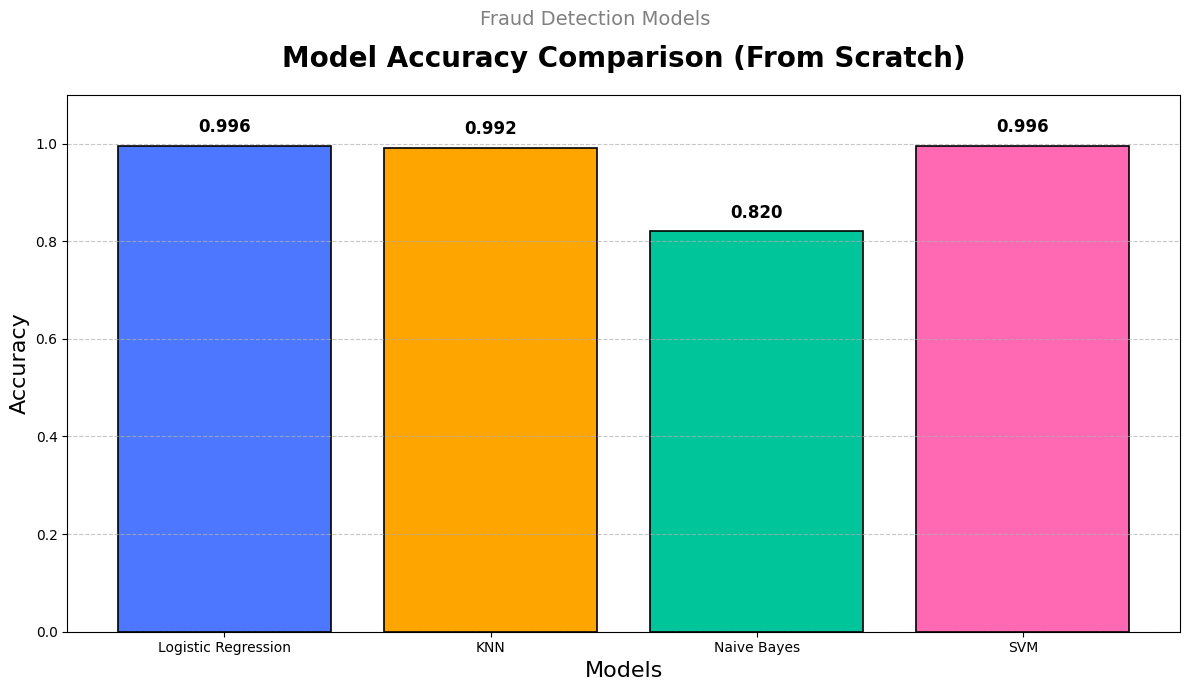

In [ ]:
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM' ]
accuracies = [acc_log_reg, acc_knn, acc_nb, acc_svm]

colors = ['#4D77FF', '#FFA500', '#00C49A', '#FF69B4']

# Plot
plt.figure(figsize=(12,7))
bars = plt.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.2)

plt.title('Model Accuracy Comparison (From Scratch)', fontsize=20, fontweight='bold', pad=20)
plt.suptitle('Fraud Detection Models', fontsize=14, color='gray')
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Models', fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{acc:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
def majority_voting(preds_list):
    preds_array = np.array(preds_list)
    final_preds = [np.bincount(preds).argmax() for preds in preds_array.T]
    return np.array(final_preds)

In [ ]:
# Example manual test inputs
X_legit = np.array([[2000.0, 1, 0, 100.0]])          # Legitimate
X_suspicious = np.array([[999999.0, 0, 1, -5000.0]]) # Suspicious
np.set_printoptions(suppress=True, precision=2, floatmode='fixed')

print("Legitimate Test Case - ")
print("Input:", X_legit[0])
print("Logistic Regression:", log_reg.predict(X_legit)[0])
print("KNN:", knn.predict(X_legit)[0])
print("Naive Bayes:", nb.predict(X_legit)[0])
print("SVM:", svm.predict(X_legit)[0])
preds_legit = [log_reg.predict(X_legit), knn.predict(X_legit), nb.predict(X_legit), svm.predict(X_legit)]
print("Majority Vote:", majority_voting(preds_legit)[0])

print("\nSuspicious Test Case - ")
print("Input:", X_suspicious[0])
print("Logistic Regression:", log_reg.predict(X_suspicious)[0])
print("KNN:", knn.predict(X_suspicious)[0])
print("Naive Bayes:", nb.predict(X_suspicious)[0])
print("SVM:", svm.predict(X_suspicious)[0])
preds_suspicious = [log_reg.predict(X_suspicious), knn.predict(X_suspicious), nb.predict(X_suspicious), svm.predict(X_suspicious)]
print("Majority Vote:", majority_voting(preds_suspicious)[0])

Legitimate Test Case - 
Input: [2000.00    1.00    0.00  100.00]
Logistic Regression: 1
KNN: 0
Naive Bayes: 0
SVM: 1
Majority Vote: 0

Suspicious Test Case - 
Input: [999999.00      0.00      1.00  -5000.00]
Logistic Regression: 1
KNN: 0
Naive Bayes: 1
SVM: 1
Majority Vote: 1


In [ ]:
models = {
    'knn_model.pkl': knn,
    'nb_model.pkl': nb,
    'log_reg_model.pkl': log_reg,
    'svm_model.pkl': svm,
}

import pickle
from google.colab import files

for filename, model in models.items():
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit numpy pandas scikit-learn pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
from pyngrok import ngrok
import os


In [ ]:
app_code = """
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load and preprocess data
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv', nrows=10000)
df['isPayment'] = df['type'].apply(lambda x: 1 if x in ['PAYMENT', 'DEBIT'] else 0)
df['isMovement'] = df['type'].apply(lambda x: 1 if x in ['CASH_OUT', 'TRANSFER'] else 0)
df['accountDiff'] = df['oldbalanceOrg'] - df['oldbalanceDest']
df = df[df['amount'] < 5000000]

X = df[['amount', 'isPayment', 'isMovement', 'accountDiff']].values
y = df['isFraud'].values

# Normalize input features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.epochs):
            linear = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear)

            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)

    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear)
        return np.where(y_pred >= 0.5, 1, 0)

# KNN from Scratch
class KNNScratch:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        preds = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            k_indices = distances.argsort()[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            majority_vote = np.bincount(k_nearest_labels).argmax()
            preds.append(majority_vote)
        return np.array(preds)

# Naive Bayes from Scratch
class NaiveBayesScratch:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-6
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        preds = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.var[c]))
                likelihood -= 0.5 * np.sum(((x - self.mean[c]) ** 2) / self.var[c])
                posterior = prior + likelihood
                posteriors.append(posterior)
            preds.append(self.classes[np.argmax(posteriors)])
        return np.array(preds)

# SVM from Scratch
class SVMScratch:
    def __init__(self, lr=0.001, epochs=1000, lambda_param=0.01):
        self.lr = lr
        self.epochs = epochs
        self.lambda_param = lambda_param

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            for idx, xi in enumerate(X):
                condition = y_[idx] * (np.dot(xi, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights - np.dot(xi, y_[idx]))
                    self.bias -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.where(approx >= 0, 1, 0)

# Train models
log_reg = LogisticRegressionScratch(lr=0.01, epochs=1000)
log_reg.fit(X_train, y_train)

knn = KNNScratch(k=5)
knn.fit(X_train, y_train)

nb = NaiveBayesScratch()
nb.fit(X_train, y_train)

svm = SVMScratch(lr=0.001, epochs=1000)
svm.fit(X_train, y_train)

# Streamlit UI
st.title("Fraud Detection System (Ensemble Voting)")

# Model dictionary
models = {
    "Logistic Regression": log_reg,
    "KNN": knn,
    "Naive Bayes": nb,
    "SVM": svm
}

# Input fields
st.header("Enter Transaction Details")
amount = st.number_input("Transaction Amount", min_value=0.0, value=2000.0)
isPayment = st.selectbox("Is Payment", [1, 0])
isMovement = st.selectbox("Is Movement", [1, 0])
accountDiff = st.number_input("Account Difference", value=100.0)

# Prepare input
input_features = np.array([[amount, isPayment, isMovement, accountDiff]])
input_features = (input_features - X_mean) / X_std

# Predict using all models
if st.button("Make Prediction"):
    predictions = {}
    for name, model in models.items():
        try:
            pred = model.predict(input_features)[0]
            predictions[name] = pred
        except Exception as e:
            st.warning(f"{name} model failed: {e}")
            predictions[name] = None

    # Majority vote
    valid_preds = [p for p in predictions.values() if p is not None]
    if not valid_preds:
        st.error("No valid predictions from models.")
    else:
        vote_counts = Counter(valid_preds)
        majority_vote = vote_counts.most_common(1)[0][0]

        # Display results
        st.subheader("Model Predictions")
        for model_name, pred in predictions.items():
            if pred is not None:
                label = "Fraud" if pred == 1 else "Legit"
                st.write(f"**{model_name}**: {label}")

        st.subheader("Final Decision")
        if majority_vote == 1:
            st.error("⚠️ Fraudulent Transaction Detected!")
        else:
            st.success("✅ Legitimate Transaction")


"""

In [ ]:
with open('app.py', 'w') as f:
    f.write(app_code)

In [ ]:
ngrok.kill()

# Set up ngrok for public URL
!ngrok authtoken 2w5GWO5ExSkMnyWiiyPwPGMqkiY_MTxgEibjMG3XxM8QsXRo  # Your ngrok auth token
public_url = ngrok.connect(8501)
print(f"Streamlit app is running at: {public_url}")

# Run the Streamlit app in the background
!streamlit run app.py &>/dev/null&

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app is running at: NgrokTunnel: "https://e346-34-90-76-240.ngrok-free.app" -> "http://localhost:8501"
